# ML Medical Records

## Part 1: Load From SQL

In [1]:
from getpass import getpass
import kardiasclean
import pandas as pd

import kardiasclean
import nltk

# Connect to database with password
password = getpass('Enter database password')
host = "kardias-test.cvj7xeynbmtt.us-east-1.rds.amazonaws.com"
pgm = kardiasclean.PostgresManager("kardias", password, host)

Enter database password········


In [2]:
a = "diagnosis_general_map"
b = "diagnosis_general"
df = pgm.read_query(f"""
        SELECT * FROM
        patients as pat
        JOIN {a} as a
        ON a.patient_id = pat.patient_id
        JOIN {b} as b
        ON b.token = a.token;
    """
)
print(df.columns.values)
df = df.T.groupby(level=0).first().T
df

['patient_id' 'gender' 'state' 'municipality' 'altitude' 'age' 'weight_kg'
 'height_cm' 'appearance' 'cx_previous' 'date_birth' 'date_procedure'
 'rachs' 'stay_days' 'expired' 'patient_id' 'token' 'token'
 'diagnosis_general' 'keywords']


,age,altitude,appearance,cx_previous,date_birth,date_procedure,diagnosis_general,expired,gender,height_cm,keywords,municipality,patient_id,rachs,state,stay_days,token,weight_kg
0,3942,2726,Normal,0,2001-08-22,2012-04-08,Ninguno,0,0,134.0,Ninguno,Huixquilucan,0,1.0,Estado de México,2.0,NNKN,35.0
1,3202,2741,Desnutrido,0,2003-09-19,2012-11-08,Ninguno,0,1,117.0,Ninguno,Timilpan,1,1.0,Estado de México,2.0,NNKN,18.0
2,3147,2240,Normal,0,2003-11-21,2012-08-18,Ninguno,0,0,120.0,Ninguno,Coyoacán,2,1.0,Ciudad de México,2.0,NNKN,22.0
3,4005,2220,Normal,0,2001-10-07,2012-08-25,Ninguno,0,0,147.0,Ninguno,Nezahualcoyotl,3,1.0,Estado de México,2.0,NNKN,42.0
4,5289,2373,Normal,0,1997-12-22,2012-01-09,Ninguno,0,0,157.0,Ninguno,Alvaro Obregón,4,1.0,Ciudad de México,3.0,NNKN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,14,1980,Normal,0,2022-10-10,2022-10-24,Hidrocele bilateral,0,1,50.0,Hidrocele bilateral,Atotonilco el Grande,1035,4.0,Hidalgo,-44214.0,HTRSLPLTRL,3.23
1423,14,1980,Normal,0,2022-10-10,2022-10-24,Hijo de madre con diabetes gestacional,0,1,50.0,Hijo diabetes gestacional madre,Atotonilco el Grande,1035,4.0,Hidalgo,-44214.0,HJTPTSJSTSNLMTR,3.23
1424,14,1980,Normal,0,2022-10-10,2022-10-24,Hiperbilirrubinemia\r\nmultifactorial remitida,0,1,50.0,Hiperbilirrubinemia\r\nmultifactorial remitida,Atotonilco el Grande,1035,4.0,Hidalgo,-44214.0,HPRPLRPNMMLTFKTRLRMTT,3.23
1425,67,2100,Desnutrido,0,2022-08-24,2022-10-31,Displasia broncopulmonar,0,1,53.5,Displasia broncopulmonar,Iztapalapa,1037,3.0,Ciudad de México,-44220.0,TSPLSPRNKPLMNR,3.8


In [3]:
# Get dataframe from sql
columns = [
    "patient_id",
    "diagnosis_general",
    "gender", 
    "age", 
    "weight_kg", 
    "height_cm", 
    "stay_days"
]
df = df[columns]
df.count()

patient_id           1427
diagnosis_general    1427
gender               1427
age                  1427
weight_kg            1427
height_cm            1427
stay_days            1427
dtype: int64

In [4]:
dft = pgm.read_table("diagnosis_general")
dft

,token,diagnosis_general,keywords
0,NNKN,Ninguno,Ninguno
1,FKTR,VACTER,VACTER
2,TRSM,Trisomia 21,21 Trisomia
3,TSMRFLJKSNTRM,Sindrome Dismorfologico E/E,Dismorfologico E/E Sindrome
4,SKMTRRTRS,Retraso Psicomotor,Psicomotor Retraso
...,...,...,...
588,HTRSLPLTRL,Hidrocele bilateral,Hidrocele bilateral
589,HJTPTSJSTSNLMTR,Hijo de madre con diabetes gestacional,Hijo diabetes gestacional madre
590,HPRPLRPNMMLTFKTRLRMTT,Hiperbilirrubinemia\r\nmultifactorial remitida,Hiperbilirrubinemia\r\nmultifactorial remitida
591,TSPLSPRNKPLMNR,Displasia broncopulmonar,Displasia broncopulmonar


<AxesSubplot:xlabel='weight_kg', ylabel='height_cm'>

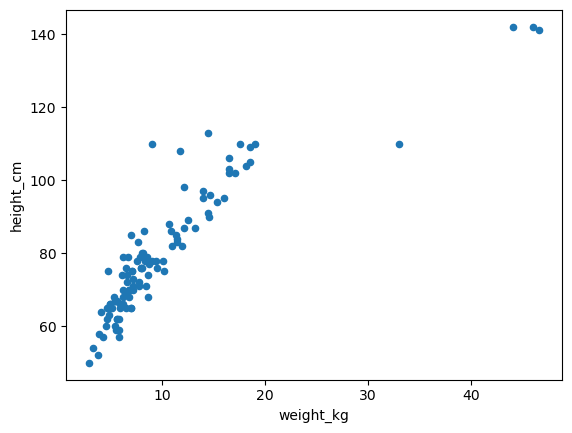

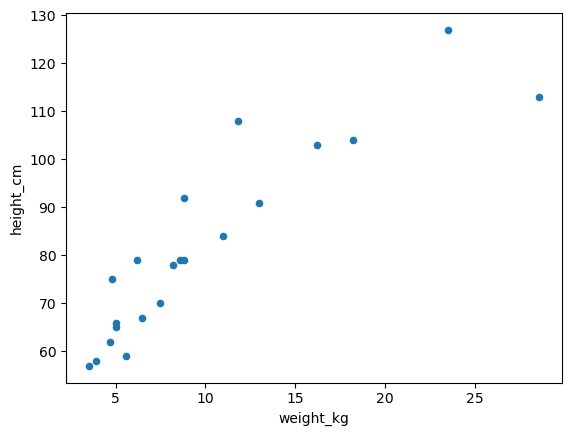

In [9]:
# Plot data
import matplotlib.pyplot as plt

df[df['diagnosis_general'] == 'Trisomia 21'].plot(kind='scatter', x='weight_kg', y='height_cm')
df[df['diagnosis_general'] == 'Hipotiroidismo'].plot(kind='scatter', x='weight_kg', y='height_cm')

## Part 2: ML Pre-Processing

1. Bin data by frequency.
2. Use only high frequency values.
3. Encode data and merge with original.

In [8]:
# Bin
bins = kardiasclean.perform_binning_quantile(df, 'diagnosis_general', quantile=0.95)
bins

Other                                                                                                                                                                                                                                                          616
Ninguno                                                                                                                                                                                                                                                        497
Trisomia 21                                                                                                                                                                                                                                                    109
Sindrome de Down                                                                                                                                                                                                               

In [10]:
low, high = kardiasclean.perform_frequency_split_quantile(df['diagnosis_general'], 0.95)
high

Ninguno                                                                                                                                                                                                                                                        497
Trisomia 21                                                                                                                                                                                                                                                    109
Sindrome de Down                                                                                                                                                                                                                                                44
Hipotiroidismo                                                                                                                                                                                                                 

In [11]:
# Print eval
evaluation = kardiasclean.evaluate_distribution(high, low)
print(evaluation)

Number of high frequency data: 811
Number of low frequency data: 616
--------------------
Total Number of data: 1427.
Percentage of high data: 56.83%
Percentage of low data: 43.17%
--------------------
Summary
--------------------
From 1427 data, 35 account for 56.83% of the total count.



In [12]:
# Get only high frequency values from original df
high_freq_df = df[df['diagnosis_general'].isin(high.index)]
# save to csv
#high_freq_df.to_csv("./resources/high_freq_test.csv")  #Obtain CSV file
high_freq_df.head()

,patient_id,diagnosis_general,gender,age,weight_kg,height_cm,stay_days
0,0,Ninguno,0,3942,35.0,134.0,2.0
1,1,Ninguno,1,3202,18.0,117.0,2.0
2,2,Ninguno,0,3147,22.0,120.0,2.0
3,3,Ninguno,0,4005,42.0,147.0,2.0
4,4,Ninguno,0,5289,40.0,157.0,3.0


In [13]:
# encode selected data
encoded_df = kardiasclean.perform_matrix_encoding(high_freq_df['diagnosis_general'], high_freq_df['patient_id'])
encoded_df.head()

,patient_id,diagnosis_general_Ninguno,diagnosis_general_Trisomia 21,diagnosis_general_Sindrome Dismorfologico E/E,diagnosis_general_Sindrome de Down,diagnosis_general_Labio y paladar hendido,diagnosis_general_Retraso en el desarrollo psicomotor,diagnosis_general_Situs inversus total,diagnosis_general_Retraso global del neurodesarrollo,diagnosis_general_Criptorquidea bilateral,...,diagnosis_general_Pentalogia de Cantrell,diagnosis_general_hipotiroidismo congenito,diagnosis_general_escoliosis,diagnosis_general_Multiples dismorfias mayores Pb sx genetico con involucro neurologico microcefalia hipoplasia de orbita derecha hipotonia retraso global del desarrollo Pb SX de Aicard disgenesia de cuerpo calloso microcefalia microoftalmia pb ceguera en ojo izquierdo,diagnosis_general_Bajo peso para la edad,diagnosis_general_Peso bajo para la edad gestacional,diagnosis_general_Desnutricion,diagnosis_general_Asplenia,diagnosis_general_Heterotaxia,diagnosis_general_Sobrepeso
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# merge encoded with original 
merged_df = pd.merge(high_freq_df, encoded_df)
merged_df = merged_df.drop("diagnosis_general", axis=1)
merged_df.head()

,patient_id,gender,age,weight_kg,height_cm,stay_days,diagnosis_general_Ninguno,diagnosis_general_Trisomia 21,diagnosis_general_Sindrome Dismorfologico E/E,diagnosis_general_Sindrome de Down,...,diagnosis_general_Pentalogia de Cantrell,diagnosis_general_hipotiroidismo congenito,diagnosis_general_escoliosis,diagnosis_general_Multiples dismorfias mayores Pb sx genetico con involucro neurologico microcefalia hipoplasia de orbita derecha hipotonia retraso global del desarrollo Pb SX de Aicard disgenesia de cuerpo calloso microcefalia microoftalmia pb ceguera en ojo izquierdo,diagnosis_general_Bajo peso para la edad,diagnosis_general_Peso bajo para la edad gestacional,diagnosis_general_Desnutricion,diagnosis_general_Asplenia,diagnosis_general_Heterotaxia,diagnosis_general_Sobrepeso
0,0,0,3942,35.0,134.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,3202,18.0,117.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,3147,22.0,120.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,4005,42.0,147.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,5289,40.0,157.0,3.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# TODO: Scale Values (NEED TO COMPLETE DATA CLEANING FIRST!)
# import scikitlearn scaler, etc.

## Part 7: Machine Learning

In [11]:
# TODO: ML
# import keras, scikitlearn, etc.